In [1]:
import uproot
import numpy as np
import awkward as ak
from ROOT import TLorentzVector

In [2]:
fname = "4531AE5A-5C3B-F446-A0E3-B9DAA19B87C5.root"

In [3]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [210]:
nEvents = Events.event

# nPhoton = Events["nPhoton"]

pt_cut_10 = Events.Photon.pt>10.0
pt_cut_18 = Events.Photon.pt>18.0
pt_cut_30 = Events.Photon.pt>30.0

nPhoton_cut_10 = ak.num(Events.Photon[pt_cut_10].pt)
nPhoton_cut_18 = ak.num(Events.Photon[pt_cut_18].pt)
nPhoton_cut_30 = ak.num(Events.Photon[pt_cut_30].pt)

gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

is_A = (abs(gen.pdgId) == 35)

A = gen[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

photons = gen[(gen.pdgId == 22) & (gen.status == 1)]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

# Pad to at least 2 photons per event (None if not available)
photons_from_a_padded = ak.pad_none(photons_from_a, 2, axis=1, clip=True)

# Extract pt, eta, phi
pho_from_a_pt  = photons_from_a_padded.pt
pho_from_a_eta = photons_from_a_padded.eta
pho_from_a_phi = photons_from_a_padded.phi

# Split leading and subleading, replacing None with NaN
pho_from_a_pt_1  = ak.fill_none(pho_from_a_pt[:, 0], np.nan)
pho_from_a_pt_2  = ak.fill_none(pho_from_a_pt[:, 1], np.nan)
pho_from_a_eta_1 = ak.fill_none(pho_from_a_eta[:, 0], np.nan)
pho_from_a_eta_2 = ak.fill_none(pho_from_a_eta[:, 1], np.nan)
pho_from_a_phi_1 = ak.fill_none(pho_from_a_phi[:, 0], np.nan)
pho_from_a_phi_2 = ak.fill_none(pho_from_a_phi[:, 1], np.nan)

# Sort photons by pt
sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]

# Pad to at least 2 photons per event (None if missing)
sorted_photons_padded = ak.pad_none(sorted_photons, 2, axis=1, clip=True)

# Extract leading and subleading with NaN fill
lead_pt_pho_gen  = ak.fill_none(sorted_photons_padded.pt[:, 0],  np.nan)
sublead_pt_pho_gen  = ak.fill_none(sorted_photons_padded.pt[:, 1],  np.nan)

lead_eta_pho_gen = ak.fill_none(sorted_photons_padded.eta[:, 0], np.nan)
sublead_eta_pho_gen = ak.fill_none(sorted_photons_padded.eta[:, 1], np.nan)

lead_phi_pho_gen = ak.fill_none(sorted_photons_padded.phi[:, 0], np.nan)
sublead_phi_pho_gen = ak.fill_none(sorted_photons_padded.phi[:, 1], np.nan)

bquarks = gen[abs(gen.pdgId) == 5]
mother_idx = bquarks.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
bquarks_from_a = bquarks[from_a_mask]

bquark_from_a_pt = bquarks_from_a.pt
bquark_from_a_eta = bquarks_from_a.eta
bquark_from_a_phi = bquarks_from_a.phi

bquark_from_a_pt_1 = bquark_from_a_pt[:, 0]
bquark_from_a_pt_2 = bquark_from_a_pt[:, 1]
bquark_from_a_eta_1 = bquark_from_a_eta[:, 0]
bquark_from_a_eta_2 = bquark_from_a_eta[:, 1]
bquark_from_a_phi_1 = bquark_from_a_phi[:, 0]
bquark_from_a_phi_2 = bquark_from_a_phi[:, 1]

sorted_bquarks = bquarks_from_a[ak.argsort(bquarks_from_a.pt, axis=1, ascending=False)]
lead_pt_bquark_gen = sorted_bquarks.pt[:, 0]
sublead_pt_bquark_gen = sorted_bquarks.pt[:, 1]
lead_eta_bquark_gen = sorted_bquarks.eta[:, 0]
sublead_eta_bquark_gen = sorted_bquarks.eta[:, 1]
lead_phi_bquark_gen = sorted_bquarks.phi[:, 0]
sublead_phi_bquark_gen = sorted_bquarks.phi[:, 1]

# Don't drop events up front!
reco_photons = Events.Photon  # keep all events

# Sort photons by pt
sorted_reco_photons = reco_photons[ak.argsort(reco_photons.pt, axis=1, ascending=False)]

# Pad so every event has at least 2 photons (None if missing)
sorted_reco_padded = ak.pad_none(sorted_reco_photons, 2, axis=1, clip=True)

# Fill missing with NaN
Reco_lead_pho_pt  = ak.fill_none(sorted_reco_padded.pt[:, 0],  np.nan)
Reco_sublead_pho_pt  = ak.fill_none(sorted_reco_padded.pt[:, 1],  np.nan)

Reco_lead_pho_eta = ak.fill_none(sorted_reco_padded.eta[:, 0], np.nan)
Reco_sublead_pho_eta = ak.fill_none(sorted_reco_padded.eta[:, 1], np.nan)

Reco_lead_pho_phi = ak.fill_none(sorted_reco_padded.phi[:, 0], np.nan)
Reco_sublead_pho_phi = ak.fill_none(sorted_reco_padded.phi[:, 1], np.nan)

def delta_r(eta1, phi1, eta2, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    deta = eta1 - eta2
    return np.sqrt(deta**2 + dphi**2)

# ---------------- ΔR between gen lead/sublead photons and all reco photons ----------------
dr_pho_lead    = delta_r(lead_eta_pho_gen, lead_phi_pho_gen, reco_photons.eta, reco_photons.phi)
dr_pho_sublead = delta_r(sublead_eta_pho_gen, sublead_phi_pho_gen, reco_photons.eta, reco_photons.phi)

# --- select closest reco photon per gen photon ---
min_idx_pho1 = ak.argmin(dr_pho_lead, axis=1, keepdims=False)
min_idx_pho2 = ak.argmin(dr_pho_sublead, axis=1, keepdims=False)

min_dr_pho1 = ak.min(dr_pho_lead, axis=1, initial=np.inf)
min_dr_pho2 = ak.min(dr_pho_sublead, axis=1, initial=np.inf)

# mask away if ΔR >= 0.1
min_idx_pho1 = ak.mask(min_idx_pho1, min_dr_pho1 < 0.1)
min_idx_pho2 = ak.mask(min_idx_pho2, min_dr_pho2 < 0.1)

# --- conflict resolution (if needed, e.g., same reco photon matched to both gen photons) ---
same_idx_pho = (min_idx_pho1 == min_idx_pho2) & ~ak.is_none(min_idx_pho1) & ~ak.is_none(min_idx_pho2)
both_valid_pho = ~ak.is_none(min_idx_pho1) & ~ak.is_none(min_idx_pho2)
indices_equal_pho = ak.where(both_valid_pho, min_idx_pho1 == min_idx_pho2, False)
conflict_pho = both_valid_pho & indices_equal_pho
valid_dr_pho = ~ak.is_none(dr_pho_lead) & ~ak.is_none(dr_pho_sublead)
compare_mask_pho = conflict_pho & valid_dr_pho

keep_pho1 = ak.where(compare_mask_pho, dr_pho_lead <= dr_pho_sublead, True)
keep_pho2 = ak.where(compare_mask_pho, dr_pho_sublead < dr_pho_lead, True)

min_idx_pho1 = ak.mask(min_idx_pho1, keep_pho1)
min_idx_pho2 = ak.mask(min_idx_pho2, keep_pho2)

photon_idx = ak.local_index(reco_photons)

mask_idx_pho1 = photon_idx == min_idx_pho1
mask_idx_pho2 = photon_idx == min_idx_pho2

# --- now select reco photons ---
selected_photon_1 = ak.firsts(reco_photons[mask_idx_pho1])
selected_photon_2 = ak.firsts(reco_photons[mask_idx_pho2])

# --- store reco photon kinematics (NaN if no match) ---
Genmatched_pho_1_pt  = ak.to_numpy(ak.fill_none(selected_photon_1.pt,  np.nan))
Genmatched_pho_2_pt  = ak.to_numpy(ak.fill_none(selected_photon_2.pt,  np.nan))
Genmatched_pho_1_eta = ak.to_numpy(ak.fill_none(selected_photon_1.eta, np.nan))
Genmatched_pho_2_eta = ak.to_numpy(ak.fill_none(selected_photon_2.eta, np.nan))
Genmatched_pho_1_phi = ak.to_numpy(ak.fill_none(selected_photon_1.phi, np.nan))
Genmatched_pho_2_phi = ak.to_numpy(ak.fill_none(selected_photon_2.phi, np.nan))

# --- GEN b-quarks from A, with status==23; keep full event alignment ---

# 1) Select b-quarks with status==23 (per-event filtering preserves event count)
gen_b = gen[(abs(gen.pdgId) == 5) & (gen.status == 23)]

# 2) Require valid mother and mother pdgId == 35 (A)
mother_idx  = gen_b.genPartIdxMother
valid_mom   = mother_idx >= 0
idx_safe    = ak.where(valid_mom, mother_idx, 0)          # avoid negative indexing
mom_pdgid   = gen[idx_safe].pdgId
from_a_mask = valid_mom & (abs(mom_pdgid) == 35)

# Keep only b’s from A (still preserves event count; events with no matches → empty lists)
gen_b_from_a = gen_b[from_a_mask]

# 3) Pad to at least 2 entries per event, then fill missing with NaN when extracting
gen_b_padded = ak.pad_none(gen_b_from_a, 2, axis=1, clip=True)

# --- As-stored (index 0 / 1) ---
gen_b_pt_1  = ak.to_numpy(ak.fill_none(gen_b_padded.pt[:, 0],  np.nan))
gen_b_eta_1 = ak.to_numpy(ak.fill_none(gen_b_padded.eta[:, 0], np.nan))
gen_b_phi_1 = ak.to_numpy(ak.fill_none(gen_b_padded.phi[:, 0], np.nan))

gen_b_pt_2  = ak.to_numpy(ak.fill_none(gen_b_padded.pt[:, 1],  np.nan))
gen_b_eta_2 = ak.to_numpy(ak.fill_none(gen_b_padded.eta[:, 1], np.nan))
gen_b_phi_2 = ak.to_numpy(ak.fill_none(gen_b_padded.phi[:, 1], np.nan))

# --- Sorted by pT (leading / subleading) ---
gen_b_sorted = gen_b_padded[ak.argsort(gen_b_padded.pt, axis=1, ascending=False)]

gen_lead_b_pt  = ak.to_numpy(ak.fill_none(gen_b_sorted.pt[:, 0],  np.nan))
gen_lead_b_eta = ak.to_numpy(ak.fill_none(gen_b_sorted.eta[:, 0], np.nan))
gen_lead_b_phi = ak.to_numpy(ak.fill_none(gen_b_sorted.phi[:, 0], np.nan))

gen_sublead_b_pt  = ak.to_numpy(ak.fill_none(gen_b_sorted.pt[:, 1],  np.nan))
gen_sublead_b_eta = ak.to_numpy(ak.fill_none(gen_b_sorted.eta[:, 1], np.nan))
gen_sublead_b_phi = ak.to_numpy(ak.fill_none(gen_b_sorted.phi[:, 1], np.nan))



# --- Select reco b-jets ---
bjets_all = Events.Jet[(Events.Jet.hadronFlavour == 5)]

# Keep all events aligned, pad missing with NaN
bjets_padded = ak.pad_none(bjets_all, 2, axis=1)  # at least 2 slots per event

# Reco jets (leading and subleading)
jet_pt  = ak.to_numpy(ak.fill_none(bjets_padded.pt[:, 0], np.nan))
jet_eta = ak.to_numpy(ak.fill_none(bjets_padded.eta[:, 0], np.nan))
jet_phi = ak.to_numpy(ak.fill_none(bjets_padded.phi[:, 0], np.nan))

jet_sub_pt  = ak.to_numpy(ak.fill_none(bjets_padded.pt[:, 1], np.nan))
jet_sub_eta = ak.to_numpy(ak.fill_none(bjets_padded.eta[:, 1], np.nan))
jet_sub_phi = ak.to_numpy(ak.fill_none(bjets_padded.phi[:, 1], np.nan))

# ---------------- ΔR between gen b1/b2 and all reco b-jets ----------------
# ---------------- ΔR between gen b1/b2 and all reco b-jets ----------------
dr_b1 = delta_r(gen_lead_b_eta, gen_lead_b_phi, bjets_all.eta, bjets_all.phi)
dr_b2 = delta_r(gen_sublead_b_eta, gen_sublead_b_phi, bjets_all.eta, bjets_all.phi)

# --- select closest reco jet per gen b ---
min_idx_b1 = ak.argmin(dr_b1, axis=1, keepdims=False)
min_idx_b2 = ak.argmin(dr_b2, axis=1, keepdims=False)

min_dr_b1 = ak.min(dr_b1, axis=1, initial=np.inf)
min_dr_b2 = ak.min(dr_b2, axis=1, initial=np.inf)

# mask away if ΔR >= 0.4
min_idx_b1 = ak.mask(min_idx_b1, min_dr_b1 < 0.4)
min_idx_b2 = ak.mask(min_idx_b2, min_dr_b2 < 0.4)

# --- conflict resolution ---
same_idx = (
    (min_idx_b1 == min_idx_b2)
    & ~ak.is_none(min_idx_b1)
    & ~ak.is_none(min_idx_b2)
)

# Start with both_valid mask
both_valid = ~ak.is_none(min_idx_b1) & ~ak.is_none(min_idx_b2)

# Only compare min_idx_b1 == min_idx_b2 where both are valid
indices_equal = ak.where(both_valid, min_idx_b1 == min_idx_b2, False)

# True conflict: both valid AND indices equal
conflict = both_valid & indices_equal

# Only compare ΔR where conflict exists and both dr are valid
valid_dr = ~ak.is_none(dr_b1) & ~ak.is_none(dr_b2)
compare_mask = conflict & valid_dr

# Determine which index to keep
keep_b1 = ak.where(compare_mask, dr_b1 <= dr_b2, True)
keep_b2 = ak.where(compare_mask, dr_b2 < dr_b1, True)

# Apply masks
min_idx_b1 = ak.mask(min_idx_b1, keep_b1)
min_idx_b2 = ak.mask(min_idx_b2, keep_b2)

bjets_idx = ak.local_index(bjets_all)

mask_idx_b1 = bjets_idx == min_idx_b1
mask_idx_b2 = bjets_idx == min_idx_b2

# # --- now select reco jets ---
selected_bjet_1 = ak.firsts(bjets_all[mask_idx_b1])
selected_bjet_2 = ak.firsts(bjets_all[mask_idx_b2])

Genmatched_bjet1_pt  = ak.to_numpy(ak.fill_none(selected_bjet_1.pt,  np.nan))
Genmatched_bjet1_eta = ak.to_numpy(ak.fill_none(selected_bjet_1.eta, np.nan))
Genmatched_bjet1_phi = ak.to_numpy(ak.fill_none(selected_bjet_1.phi, np.nan))
Genmatched_bjet1_mass  = ak.to_numpy(ak.fill_none(selected_bjet_1.mass,  np.nan))

Genmatched_bjet2_pt  = ak.to_numpy(ak.fill_none(selected_bjet_2.pt,  np.nan))
Genmatched_bjet2_eta = ak.to_numpy(ak.fill_none(selected_bjet_2.eta, np.nan))
Genmatched_bjet2_phi = ak.to_numpy(ak.fill_none(selected_bjet_2.phi, np.nan))
Genmatched_bjet2_mass = ak.to_numpy(ak.fill_none(selected_bjet_2.mass, np.nan))

# ---------------- Sorted reco b-jets (leading/subleading) ----------------
sorted_reco_bjets = bjets_padded[ak.argsort(bjets_padded.pt, axis=1, ascending=False)]
sorted_reco_bjets_padded = ak.pad_none(sorted_reco_bjets, 2, axis=1, clip=True)

Reco_lead_bjet_pt  = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.pt[:, 0], np.nan))
Reco_lead_bjet_eta = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.eta[:, 0], np.nan))
Reco_lead_bjet_phi = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.phi[:, 0], np.nan))
Reco_lead_bjet_mass = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.mass[:, 0], np.nan))

Reco_sublead_bjet_pt  = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.pt[:, 1], np.nan))
Reco_sublead_bjet_eta = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.eta[:, 1], np.nan))
Reco_sublead_bjet_phi = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.phi[:, 1], np.nan))
Reco_sublead_bjet_mass = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.mass[:, 1], np.nan))

# ---------------- Gen b-jets from A ----------------
gen_b_from_a_padded = ak.pad_none(gen_b_from_a, 2, axis=1)

gen_b1_pt = ak.to_numpy(ak.fill_none(gen_b_from_a_padded.pt[:, 0], np.nan))
gen_b2_pt = ak.to_numpy(ak.fill_none(gen_b_from_a_padded.pt[:, 1], np.nan))


In [215]:
# Assume these are Awkward Arrays of shape (N,)
pt1, eta1, phi1, mass1 = Genmatched_bjet1_pt  , Genmatched_bjet1_eta , Genmatched_bjet1_phi , Genmatched_bjet1_mass
pt2, eta2, phi2, mass2 = Genmatched_bjet2_pt , Genmatched_bjet2_eta, Genmatched_bjet2_phi, Genmatched_bjet2_mass

# Convert to NumPy arrays
pt1 = ak.to_numpy(pt1)
eta1 = ak.to_numpy(eta1)
phi1 = ak.to_numpy(phi1)
mass1 = ak.to_numpy(mass1)
pt2 = ak.to_numpy(pt2)
eta2 = ak.to_numpy(eta2)
phi2 = ak.to_numpy(phi2)
mass2 = ak.to_numpy(mass2)

# Mask invalid entries (NaNs or None)
valid_mask = ~np.isnan(pt1 + eta1 + phi1 + mass1 + pt2 + eta2 + phi2 + mass2)

pt1, eta1, phi1, mass1 = pt1[valid_mask], eta1[valid_mask], phi1[valid_mask], mass1[valid_mask]
pt2, eta2, phi2, mass2 = pt2[valid_mask], eta2[valid_mask], phi2[valid_mask], mass2[valid_mask]

# Create TLorentzVectors and compute invariant mass
invmasses_bb = np.empty(len(pt1))
vec1 = TLorentzVector()
vec2 = TLorentzVector()

for i in range(len(pt1)):
    vec1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i])
    vec2.SetPtEtaPhiM(pt2[i], eta2[i], phi2[i], mass2[i])
    invmasses_bb[i] = (vec1 + vec2).M()


# Assume these are Awkward Arrays of shape (N,)
pho1_pt, pho1_eta, pho1_phi, pho1_mass = Genmatched_pho_1_pt, Genmatched_pho_1_eta, Genmatched_pho_1_phi, np.zeros_like(Genmatched_pho_1_pt)
pho2_pt, pho2_eta, pho2_phi, pho2_mass = Genmatched_pho_2_pt, Genmatched_pho_2_eta, Genmatched_pho_2_phi, np.zeros_like(Genmatched_pho_2_pt)

# Convert to NumPy arrays
pho1_pt   = ak.to_numpy(pho1_pt)
pho1_eta  = ak.to_numpy(pho1_eta)
pho1_phi  = ak.to_numpy(pho1_phi)
pho1_mass = ak.to_numpy(pho1_mass)

pho2_pt   = ak.to_numpy(pho2_pt)
pho2_eta  = ak.to_numpy(pho2_eta)
pho2_phi  = ak.to_numpy(pho2_phi)
pho2_mass = ak.to_numpy(pho2_mass)

# Mask invalid entries (NaNs or None)
valid_mask_pho = ~np.isnan(pho1_pt + pho1_eta + pho1_phi + pho1_mass + pho2_pt + pho2_eta + pho2_phi + pho2_mass)

pho1_pt, pho1_eta, pho1_phi, pho1_mass = pho1_pt[valid_mask_pho], pho1_eta[valid_mask_pho], pho1_phi[valid_mask_pho], pho1_mass[valid_mask_pho]
pho2_pt, pho2_eta, pho2_phi, pho2_mass = pho2_pt[valid_mask_pho], pho2_eta[valid_mask_pho], pho2_phi[valid_mask_pho], pho2_mass[valid_mask_pho]

# Create TLorentzVectors and compute invariant mass
invmasses_photons = np.empty(len(pho1_pt))
vec_pho1 = TLorentzVector()
vec_pho2 = TLorentzVector()

for i in range(len(pho1_pt)):
    vec_pho1.SetPtEtaPhiM(pho1_pt[i], pho1_eta[i], pho1_phi[i], pho1_mass[i])
    vec_pho2.SetPtEtaPhiM(pho2_pt[i], pho2_eta[i], pho2_phi[i], pho2_mass[i])
    invmasses_photons[i] = (vec_pho1 + vec_pho2).M()


In [219]:
gen_invmasses_diphoton = np.empty(len(pho_from_a_pt_1), dtype=np.float32)
gen_invmasses_bb = np.empty(len(bquark_from_a_pt_1), dtype=np.float32)

pho_from_a_mass_1 = np.zeros_like(pho_from_a_pt_1, dtype=np.float32)
pho_from_a_mass_2 = np.zeros_like(pho_from_a_pt_1, dtype=np.float32)

# bquark_from_a_mass_1 = ak.to_numpy(bquarks_from_a.mass[:, 0])
# bquark_from_a_mass_2 = ak.to_numpy(bquarks_from_a.mass[:, 1])
bquark_from_a_mass_1 = np.full_like(ak.to_numpy(bquarks_from_a.pt[:, 0]), 4.18)
bquark_from_a_mass_2 = np.full_like(ak.to_numpy(bquarks_from_a.pt[:, 1]), 4.18)

# Masks for valid (non-NaN) gen-level photons and b-quarks
valid_mask_gg = ~np.isnan(pho_from_a_pt_1 + pho_from_a_eta_1 + pho_from_a_phi_1 + pho_from_a_mass_1 +
                        pho_from_a_pt_2 + pho_from_a_eta_2 + pho_from_a_phi_2 + pho_from_a_mass_2)

valid_mask_bb = ~np.isnan(bquark_from_a_pt_1 + bquark_from_a_eta_1 + bquark_from_a_phi_1 + bquark_from_a_mass_1 +
                        bquark_from_a_pt_2 + bquark_from_a_eta_2 + bquark_from_a_phi_2 + bquark_from_a_mass_2)

# Filter the arrays
pho_1_pt = pho_from_a_pt_1[valid_mask_gg]
pho_1_eta = pho_from_a_eta_1[valid_mask_gg]
pho_1_phi = pho_from_a_phi_1[valid_mask_gg]
pho_1_mass = pho_from_a_mass_1[valid_mask_gg]

pho_2_pt = pho_from_a_pt_2[valid_mask_gg]
pho_2_eta = pho_from_a_eta_2[valid_mask_gg]
pho_2_phi = pho_from_a_phi_2[valid_mask_gg]
pho_2_mass = pho_from_a_mass_2[valid_mask_gg]

b1_pt = bquark_from_a_pt_1[valid_mask_bb]
b1_eta = bquark_from_a_eta_1[valid_mask_bb]
b1_phi = bquark_from_a_phi_1[valid_mask_bb]
b1_mass = bquark_from_a_mass_1[valid_mask_bb]

b2_pt = bquark_from_a_pt_2[valid_mask_bb]
b2_eta = bquark_from_a_eta_2[valid_mask_bb]
b2_phi = bquark_from_a_phi_2[valid_mask_bb]
b2_mass = bquark_from_a_mass_2[valid_mask_bb]

# Prepare output arrays
gen_invmasses_diphoton = np.empty(len(pho_1_pt), dtype=np.float32)
gen_invmasses_bb = np.empty(len(b1_pt), dtype=np.float32)

p4_pho_1 = TLorentzVector()
p4_pho_2 = TLorentzVector()
p4_bq_1 = TLorentzVector()
p4_bq_2 = TLorentzVector()


for i, (PT1, ETA1, PHI1, M1, PT2, ETA2, PHI2, M2) in enumerate(zip(pho_1_pt, pho_1_eta, pho_1_phi, pho_1_mass,
                                                                pho_2_pt, pho_2_eta, pho_2_phi, pho_2_mass)):
    p4_pho_1.SetPtEtaPhiM(PT1, ETA1, PHI1, M1)
    p4_pho_2.SetPtEtaPhiM(PT2, ETA2, PHI2, M2)
    gen_invmasses_diphoton[i] = (p4_pho_1 + p4_pho_2).M()


for i, (PT1, ETA1, PHI1, M1, PT2, ETA2, PHI2, M2) in enumerate(zip(b1_pt, b1_eta, b1_phi, b1_mass,
                                                                b2_pt, b2_eta, b2_phi, b2_mass)):
    p4_bq_1.SetPtEtaPhiM(PT1, ETA1, PHI1, M1)
    p4_bq_2.SetPtEtaPhiM(PT2, ETA2, PHI2, M2)
    gen_invmasses_bb[i] = (p4_bq_1 + p4_bq_2).M()

In [214]:
len(invmasses_bb)

181130

In [216]:
len(invmasses_photons)

353477

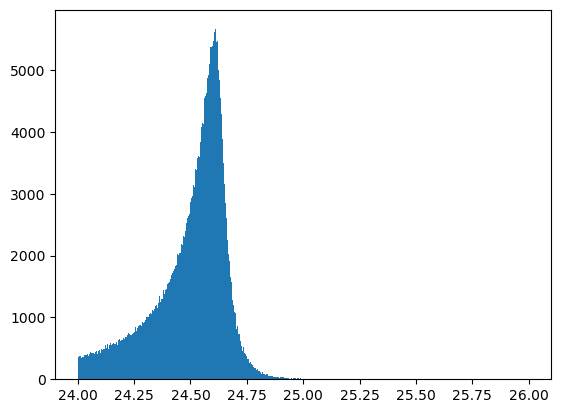

In [227]:
import matplotlib.pyplot as plt
plt.hist(gen_invmasses_bb, bins = 1000, range = (24, 26));

In [192]:
nEvents = Events.event

# nPhoton = Events["nPhoton"]

pt_cut_10 = Events.Photon.pt>10.0
pt_cut_18 = Events.Photon.pt>18.0
pt_cut_30 = Events.Photon.pt>30.0

nPhoton_cut_10 = ak.num(Events.Photon[pt_cut_10].pt)
nPhoton_cut_18 = ak.num(Events.Photon[pt_cut_18].pt)
nPhoton_cut_30 = ak.num(Events.Photon[pt_cut_30].pt)

gen = Events.GenPart
higgs_mask = (gen.pdgId == 25) & (gen.status == 62)
higgs = gen[higgs_mask]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

is_A = (abs(gen.pdgId) == 35)

A = gen[is_A]

A_pt = A.pt
A_eta = A.eta
A_phi = A.phi

A_pt_1 = A_pt[:,0]
A_pt_2 = A_pt[:,1]
A_eta_1 = A_eta[:,0]
A_eta_2 = A_eta[:,1]
A_phi_1 = A_phi[:,0]
A_phi_2 = A_phi[:,1]

sorted_As = A[ak.argsort(A_pt, axis=1, ascending=False)]

leading_A_pt = sorted_As.pt[:,0]
subleading_A_pt = sorted_As.pt[:,1]
leading_A_eta = sorted_As.eta[:,0]
subleading_A_eta = sorted_As.eta[:,1]
leading_A_phi = sorted_As.phi[:,0]
subleading_A_phi = sorted_As.phi[:,1]

photons = gen[(gen.pdgId == 22) & (gen.status == 1)]
mother_idx = photons.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
photons_from_a = photons[from_a_mask]

# Pad to at least 2 photons per event (None if not available)
photons_from_a_padded = ak.pad_none(photons_from_a, 2, axis=1, clip=True)

# Extract pt, eta, phi
pho_from_a_pt  = photons_from_a_padded.pt
pho_from_a_eta = photons_from_a_padded.eta
pho_from_a_phi = photons_from_a_padded.phi

# Split leading and subleading, replacing None with NaN
pho_from_a_pt_1  = ak.fill_none(pho_from_a_pt[:, 0], np.nan)
pho_from_a_pt_2  = ak.fill_none(pho_from_a_pt[:, 1], np.nan)
pho_from_a_eta_1 = ak.fill_none(pho_from_a_eta[:, 0], np.nan)
pho_from_a_eta_2 = ak.fill_none(pho_from_a_eta[:, 1], np.nan)
pho_from_a_phi_1 = ak.fill_none(pho_from_a_phi[:, 0], np.nan)
pho_from_a_phi_2 = ak.fill_none(pho_from_a_phi[:, 1], np.nan)

# sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]
# lead_pt_pho_gen = sorted_photons.pt[:, 0]
# sublead_pt_pho_gen = sorted_photons.pt[:, 1]
# lead_eta_pho_gen = sorted_photons.eta[:, 0]
# sublead_eta_pho_gen = sorted_photons.eta[:, 1]
# lead_phi_pho_gen = sorted_photons.phi[:, 0]
# sublead_phi_pho_gen = sorted_photons.phi[:, 1]

# Sort photons by pt
sorted_photons = photons_from_a[ak.argsort(photons_from_a.pt, axis=1, ascending=False)]

# Pad to at least 2 photons per event (None if missing)
sorted_photons_padded = ak.pad_none(sorted_photons, 2, axis=1, clip=True)

# Extract leading and subleading with NaN fill
lead_pt_pho_gen  = ak.fill_none(sorted_photons_padded.pt[:, 0],  np.nan)
sublead_pt_pho_gen  = ak.fill_none(sorted_photons_padded.pt[:, 1],  np.nan)

lead_eta_pho_gen = ak.fill_none(sorted_photons_padded.eta[:, 0], np.nan)
sublead_eta_pho_gen = ak.fill_none(sorted_photons_padded.eta[:, 1], np.nan)

lead_phi_pho_gen = ak.fill_none(sorted_photons_padded.phi[:, 0], np.nan)
sublead_phi_pho_gen = ak.fill_none(sorted_photons_padded.phi[:, 1], np.nan)

bquarks = gen[abs(gen.pdgId) == 5]
mother_idx = bquarks.genPartIdxMother
from_a_mask = gen[mother_idx].pdgId == 35
bquarks_from_a = bquarks[from_a_mask]

bquark_from_a_pt = bquarks_from_a.pt
bquark_from_a_eta = bquarks_from_a.eta
bquark_from_a_phi = bquarks_from_a.phi

bquark_from_a_pt_1 = bquark_from_a_pt[:, 0]
bquark_from_a_pt_2 = bquark_from_a_pt[:, 1]
bquark_from_a_eta_1 = bquark_from_a_eta[:, 0]
bquark_from_a_eta_2 = bquark_from_a_eta[:, 1]
bquark_from_a_phi_1 = bquark_from_a_phi[:, 0]
bquark_from_a_phi_2 = bquark_from_a_phi[:, 1]

sorted_bquarks = bquarks_from_a[ak.argsort(bquarks_from_a.pt, axis=1, ascending=False)]
lead_pt_bquark_gen = sorted_bquarks.pt[:, 0]
sublead_pt_bquark_gen = sorted_bquarks.pt[:, 1]
lead_eta_bquark_gen = sorted_bquarks.eta[:, 0]
sublead_eta_bquark_gen = sorted_bquarks.eta[:, 1]
lead_phi_bquark_gen = sorted_bquarks.phi[:, 0]
sublead_phi_bquark_gen = sorted_bquarks.phi[:, 1]

# Don't drop events up front!
reco_photons = Events.Photon  # keep all events

# Sort photons by pt
sorted_reco_photons = reco_photons[ak.argsort(reco_photons.pt, axis=1, ascending=False)]

# Pad so every event has at least 2 photons (None if missing)
sorted_reco_padded = ak.pad_none(sorted_reco_photons, 2, axis=1, clip=True)

# Fill missing with NaN
Reco_lead_pho_pt  = ak.fill_none(sorted_reco_padded.pt[:, 0],  np.nan)
Reco_sublead_pho_pt  = ak.fill_none(sorted_reco_padded.pt[:, 1],  np.nan)

Reco_lead_pho_eta = ak.fill_none(sorted_reco_padded.eta[:, 0], np.nan)
Reco_sublead_pho_eta = ak.fill_none(sorted_reco_padded.eta[:, 1], np.nan)

Reco_lead_pho_phi = ak.fill_none(sorted_reco_padded.phi[:, 0], np.nan)
Reco_sublead_pho_phi = ak.fill_none(sorted_reco_padded.phi[:, 1], np.nan)

def delta_r(eta1, phi1, eta2, phi2):
    dphi = (phi1 - phi2 + np.pi) % (2 * np.pi) - np.pi
    deta = eta1 - eta2
    return np.sqrt(deta**2 + dphi**2)

# dr_pho = delta_r(
#     lead_eta_pho_gen[:, :, None],   # (events, ngen, 1)
#     lead_phi_pho_gen[:, :, None],
#     reco_photons.eta[:, None, :],  # (events, 1, nreco)
#     reco_photons.phi[:, None, :]
# )

dr_pho_lead = delta_r(
    lead_eta_pho_gen,   # shape: (events,)
    lead_phi_pho_gen,
    reco_photons.eta,   # shape: (events, nReco)
    reco_photons.phi
)

dr_pho_sublead = delta_r(
    sublead_eta_pho_gen,   # shape: (events,)
    sublead_phi_pho_gen,
    reco_photons.eta,   # shape: (events, nReco)
    reco_photons.phi
)

# --- find the closest reco photon to gen lead/sublead
min_idx_1 = ak.argmin(dr_pho_lead, axis=1)
min_idx_2 = ak.argmin(dr_pho_sublead, axis=1)

photon_idx = ak.local_index(reco_photons)

mask_idx_1 = photon_idx == min_idx_1[:, None]
mask_idx_2 = photon_idx == min_idx_2[:, None]

mask_dR_1 = dr_pho_lead < 0.1
mask_dR_2 = dr_pho_sublead < 0.1

mask_sel_1 = mask_idx_1 & mask_dR_1
mask_sel_2 = mask_idx_2 & mask_dR_2

selected_photon_1 = ak.firsts(reco_photons[mask_sel_1])
selected_photon_2 = ak.firsts(reco_photons[mask_sel_2])

# --- Gen side: keep length consistent, fill with NaN
Gen_photon_pt_1 = ak.to_numpy(ak.fill_none(pho_from_a_pt_1, np.nan))
Gen_photon_pt_2 = ak.to_numpy(ak.fill_none(pho_from_a_pt_2, np.nan))

# --- Reco-matched to Gen photons (per-event, with NaN where no match)
Genmatched_pho_1_pt  = ak.to_numpy(ak.fill_none(selected_photon_1.pt,  np.nan))
Genmatched_pho_2_pt  = ak.to_numpy(ak.fill_none(selected_photon_2.pt,  np.nan))
Genmatched_pho_1_eta = ak.to_numpy(ak.fill_none(selected_photon_1.eta, np.nan))
Genmatched_pho_2_eta = ak.to_numpy(ak.fill_none(selected_photon_2.eta, np.nan))
Genmatched_pho_1_phi = ak.to_numpy(ak.fill_none(selected_photon_1.phi, np.nan))
Genmatched_pho_2_phi = ak.to_numpy(ak.fill_none(selected_photon_2.phi, np.nan))


gen = Events.GenPart

# --- GEN b-quarks from A, with status==23; keep full event alignment ---

# 1) Select b-quarks with status==23 (per-event filtering preserves event count)
gen_b = gen[(abs(gen.pdgId) == 5) & (gen.status == 23)]

# 2) Require valid mother and mother pdgId == 35 (A)
mother_idx  = gen_b.genPartIdxMother
valid_mom   = mother_idx >= 0
idx_safe    = ak.where(valid_mom, mother_idx, 0)          # avoid negative indexing
mom_pdgid   = gen[idx_safe].pdgId
from_a_mask = valid_mom & (abs(mom_pdgid) == 35)

# Keep only b’s from A (still preserves event count; events with no matches → empty lists)
gen_b_from_a = gen_b[from_a_mask]

# 3) Pad to at least 2 entries per event, then fill missing with NaN when extracting
gen_b_padded = ak.pad_none(gen_b_from_a, 2, axis=1, clip=True)

# --- As-stored (index 0 / 1) ---
gen_b_pt_1  = ak.to_numpy(ak.fill_none(gen_b_padded.pt[:, 0],  np.nan))
gen_b_eta_1 = ak.to_numpy(ak.fill_none(gen_b_padded.eta[:, 0], np.nan))
gen_b_phi_1 = ak.to_numpy(ak.fill_none(gen_b_padded.phi[:, 0], np.nan))

gen_b_pt_2  = ak.to_numpy(ak.fill_none(gen_b_padded.pt[:, 1],  np.nan))
gen_b_eta_2 = ak.to_numpy(ak.fill_none(gen_b_padded.eta[:, 1], np.nan))
gen_b_phi_2 = ak.to_numpy(ak.fill_none(gen_b_padded.phi[:, 1], np.nan))

# --- Sorted by pT (leading / subleading) ---
gen_b_sorted = gen_b_padded[ak.argsort(gen_b_padded.pt, axis=1, ascending=False)]

gen_lead_b_pt  = ak.to_numpy(ak.fill_none(gen_b_sorted.pt[:, 0],  np.nan))
gen_lead_b_eta = ak.to_numpy(ak.fill_none(gen_b_sorted.eta[:, 0], np.nan))
gen_lead_b_phi = ak.to_numpy(ak.fill_none(gen_b_sorted.phi[:, 0], np.nan))

gen_sublead_b_pt  = ak.to_numpy(ak.fill_none(gen_b_sorted.pt[:, 1],  np.nan))
gen_sublead_b_eta = ak.to_numpy(ak.fill_none(gen_b_sorted.eta[:, 1], np.nan))
gen_sublead_b_phi = ak.to_numpy(ak.fill_none(gen_b_sorted.phi[:, 1], np.nan))



# --- Select reco b-jets ---
bjets_all = Events.Jet[(Events.Jet.hadronFlavour == 5)]

# Keep all events aligned, pad missing with NaN
bjets_padded = ak.pad_none(bjets_all, 2, axis=1)  # at least 2 slots per event

# Reco jets (leading and subleading)
jet_pt  = ak.to_numpy(ak.fill_none(bjets_padded.pt[:, 0], np.nan))
jet_eta = ak.to_numpy(ak.fill_none(bjets_padded.eta[:, 0], np.nan))
jet_phi = ak.to_numpy(ak.fill_none(bjets_padded.phi[:, 0], np.nan))

jet_sub_pt  = ak.to_numpy(ak.fill_none(bjets_padded.pt[:, 1], np.nan))
jet_sub_eta = ak.to_numpy(ak.fill_none(bjets_padded.eta[:, 1], np.nan))
jet_sub_phi = ak.to_numpy(ak.fill_none(bjets_padded.phi[:, 1], np.nan))

# # ---------------- ΔR between gen b1/b2 and all reco b-jets ----------------
# dr_b1 = delta_r(
#     gen_lead_b_eta, gen_lead_b_phi,
#     bjets_all.eta, bjets_all.phi
# )

# dr_b2 = delta_r(
#     gen_sublead_b_eta, gen_sublead_b_phi,
#     bjets_all.eta, bjets_all.phi
# )

# # --- select closest reco jet per gen b ---
# min_idx_b1 = ak.argmin(dr_b1, axis=1, keepdims=False)
# min_idx_b2 = ak.argmin(dr_b2, axis=1, keepdims=False)

# min_dr_b1 = ak.min(dr_b1, axis=1, initial=np.inf)
# min_dr_b2 = ak.min(dr_b2, axis=1, initial=np.inf)

# # mask away if ΔR >= 0.1
# min_idx_b1 = ak.mask(min_idx_b1, min_dr_b1 < 0.4)
# min_idx_b2 = ak.mask(min_idx_b2, min_dr_b2 < 0.4)

# # --- conflict resolution ---
# same_idx = (
#     (min_idx_b1 == min_idx_b2)
#     & ~ak.is_none(min_idx_b1)
#     & ~ak.is_none(min_idx_b2)
# )

# choose_b1 = same_idx & (min_dr_b1 <= min_dr_b2)
# choose_b2 = same_idx & (min_dr_b2 <  min_dr_b1)

# none_like_b1 = ak.values_astype(ak.zeros_like(min_idx_b1), "int64")
# none_like_b1 = none_like_b1 * 0  # still zeros
# none_like_b1 = ak.mask(none_like_b1, ak.ones_like(none_like_b1) == 0)

# none_like_b2 = ak.values_astype(ak.zeros_like(min_idx_b2), "int64")
# none_like_b2 = none_like_b2 * 0
# none_like_b2 = ak.mask(none_like_b2, ak.ones_like(none_like_b2) == 0)

# min_idx_b2 = ak.where(choose_b1, none_like_b2, min_idx_b2)
# min_idx_b1 = ak.where(choose_b2, none_like_b1, min_idx_b1)


# # min_idx_b2 = ak.where(choose_b1, ak.full_like(min_idx_b2, None), min_idx_b2)
# # min_idx_b1 = ak.where(choose_b2, ak.full_like(min_idx_b1, None), min_idx_b1)


# # --- now select reco jets ---
# selected_bjet_1 = bjets_all[min_idx_b1]
# selected_bjet_2 = bjets_all[min_idx_b2]

# # Reco_matched_b1_pt  = ak.to_numpy(ak.fill_none(selected_bjet_1.pt,  np.nan))
# # Reco_matched_b2_pt  = ak.to_numpy(ak.fill_none(selected_bjet_2.pt,  np.nan))
# # Reco_matched_b1_eta = ak.to_numpy(ak.fill_none(selected_bjet_1.eta, np.nan))
# # Reco_matched_b2_eta = ak.to_numpy(ak.fill_none(selected_bjet_2.eta, np.nan))
# # Reco_matched_b1_phi = ak.to_numpy(ak.fill_none(selected_bjet_1.phi, np.nan))
# # Reco_matched_b2_phi = ak.to_numpy(ak.fill_none(selected_bjet_2.phi, np.nan))

# # selected_bjet_1 / selected_bjet_2 are currently jagged: 0 or 1 entries per event
# sel1_padded = ak.pad_none(selected_bjet_1, 1, axis=1, clip=True)
# sel2_padded = ak.pad_none(selected_bjet_2, 1, axis=1, clip=True)

# Reco_matched_b1_pt  = ak.to_numpy(ak.fill_none(sel1_padded.pt[:, 0], np.nan))
# Reco_matched_b1_eta = ak.to_numpy(ak.fill_none(sel1_padded.eta[:, 0], np.nan))
# Reco_matched_b1_phi = ak.to_numpy(ak.fill_none(sel1_padded.phi[:, 0], np.nan))

# Reco_matched_b2_pt  = ak.to_numpy(ak.fill_none(sel2_padded.pt[:, 0], np.nan))
# Reco_matched_b2_eta = ak.to_numpy(ak.fill_none(sel2_padded.eta[:, 0], np.nan))
# Reco_matched_b2_phi = ak.to_numpy(ak.fill_none(sel2_padded.phi[:, 0], np.nan))



# # ---------------- Sorted reco b-jets (leading/subleading) ----------------
# sorted_reco_bjets = bjets_padded[ak.argsort(bjets_padded.pt, axis=1, ascending=False)]
# sorted_reco_bjets_padded = ak.pad_none(sorted_reco_bjets, 2, axis=1, clip=True)

# Reco_lead_bjet_pt  = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.pt[:, 0], np.nan))
# Reco_lead_bjet_eta = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.eta[:, 0], np.nan))
# Reco_lead_bjet_phi = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.phi[:, 0], np.nan))

# Reco_sublead_bjet_pt  = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.pt[:, 1], np.nan))
# Reco_sublead_bjet_eta = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.eta[:, 1], np.nan))
# Reco_sublead_bjet_phi = ak.to_numpy(ak.fill_none(sorted_reco_bjets_padded.phi[:, 1], np.nan))

# # ---------------- Gen b-jets from A ----------------
# gen_b_from_a_padded = ak.pad_none(gen_b_from_a, 2, axis=1)

# gen_b1_pt = ak.to_numpy(ak.fill_none(gen_b_from_a_padded.pt[:, 0], np.nan))
# gen_b2_pt = ak.to_numpy(ak.fill_none(gen_b_from_a_padded.pt[:, 1], np.nan))

In [151]:
reco_photons


<Array [[{dEscaleDown: 0, ...}, ...], ...] type='736000 * var * {dEscaleDow...'>

In [148]:
mask_sel_1

<Array [[True, False], [True], ..., [True, False]] type='736000 * var * ?bool'>

In [234]:
# ---------------- ΔR between gen b1/b2 and all reco b-jets ----------------
dr_b1 = delta_r(gen_lead_b_eta, gen_lead_b_phi, bjets_all.eta, bjets_all.phi)
dr_b2 = delta_r(gen_sublead_b_eta, gen_sublead_b_phi, bjets_all.eta, bjets_all.phi)

# --- select closest reco jet per gen b ---
min_idx_b1 = ak.argmin(dr_b1, axis=1, keepdims=False)
min_idx_b2 = ak.argmin(dr_b2, axis=1, keepdims=False)

min_dr_b1 = ak.min(dr_b1, axis=1, initial=np.inf)
min_dr_b2 = ak.min(dr_b2, axis=1, initial=np.inf)

# mask away if ΔR >= 0.4
min_idx_b1 = ak.mask(min_idx_b1, min_dr_b1 < 0.4)
min_idx_b2 = ak.mask(min_idx_b2, min_dr_b2 < 0.4)

# --- conflict resolution ---
same_idx = (
    (min_idx_b1 == min_idx_b2)
    & ~ak.is_none(min_idx_b1)
    & ~ak.is_none(min_idx_b2)
)

# Start with both_valid mask
both_valid = ~ak.is_none(min_idx_b1) & ~ak.is_none(min_idx_b2)

# Only compare min_idx_b1 == min_idx_b2 where both are valid
indices_equal = ak.where(both_valid, min_idx_b1 == min_idx_b2, False)

# True conflict: both valid AND indices equal
conflict = both_valid & indices_equal

# Only compare ΔR where conflict exists and both dr are valid
valid_dr = ~ak.is_none(dr_b1) & ~ak.is_none(dr_b2)
compare_mask = conflict & valid_dr

# Determine which index to keep
keep_b1 = ak.where(compare_mask, dr_b1 <= dr_b2, True)
keep_b2 = ak.where(compare_mask, dr_b2 < dr_b1, True)

# Apply masks
min_idx_b1 = ak.mask(min_idx_b1, keep_b1)
min_idx_b2 = ak.mask(min_idx_b2, keep_b2)

bjets_idx = ak.local_index(bjets_all)

mask_idx_b1 = bjets_idx == min_idx_b1
mask_idx_b2 = bjets_idx == min_idx_b2

# # --- now select reco jets ---
selected_bjet_1 = ak.firsts(bjets_all[mask_idx_b1])
selected_bjet_2 = ak.firsts(bjets_all[mask_idx_b2])

bjet1_pt  = ak.to_numpy(ak.fill_none(selected_bjet_1.pt,  np.nan))
bjet1_eta = ak.to_numpy(ak.fill_none(selected_bjet_1.eta, np.nan))
bjet1_phi = ak.to_numpy(ak.fill_none(selected_bjet_1.phi, np.nan))

bjet2_pt  = ak.to_numpy(ak.fill_none(selected_bjet_2.pt,  np.nan))
bjet2_eta = ak.to_numpy(ak.fill_none(selected_bjet_2.eta, np.nan))
bjet2_phi = ak.to_numpy(ak.fill_none(selected_bjet_2.phi, np.nan))



In [202]:
# ---------------- ΔR between gen lead/sublead photons and all reco photons ----------------
dr_pho_lead    = delta_r(lead_eta_pho_gen, lead_phi_pho_gen, reco_photons.eta, reco_photons.phi)
dr_pho_sublead = delta_r(sublead_eta_pho_gen, sublead_phi_pho_gen, reco_photons.eta, reco_photons.phi)

# --- select closest reco photon per gen photon ---
min_idx_pho1 = ak.argmin(dr_pho_lead, axis=1, keepdims=False)
min_idx_pho2 = ak.argmin(dr_pho_sublead, axis=1, keepdims=False)

min_dr_pho1 = ak.min(dr_pho_lead, axis=1, initial=np.inf)
min_dr_pho2 = ak.min(dr_pho_sublead, axis=1, initial=np.inf)

# mask away if ΔR >= 0.1
min_idx_pho1 = ak.mask(min_idx_pho1, min_dr_pho1 < 0.1)
min_idx_pho2 = ak.mask(min_idx_pho2, min_dr_pho2 < 0.1)

# --- conflict resolution (if needed, e.g., same reco photon matched to both gen photons) ---
same_idx_pho = (min_idx_pho1 == min_idx_pho2) & ~ak.is_none(min_idx_pho1) & ~ak.is_none(min_idx_pho2)
both_valid_pho = ~ak.is_none(min_idx_pho1) & ~ak.is_none(min_idx_pho2)
indices_equal_pho = ak.where(both_valid_pho, min_idx_pho1 == min_idx_pho2, False)
conflict_pho = both_valid_pho & indices_equal_pho
valid_dr_pho = ~ak.is_none(dr_pho_lead) & ~ak.is_none(dr_pho_sublead)
compare_mask_pho = conflict_pho & valid_dr_pho

keep_pho1 = ak.where(compare_mask_pho, dr_pho_lead <= dr_pho_sublead, True)
keep_pho2 = ak.where(compare_mask_pho, dr_pho_sublead < dr_pho_lead, True)

min_idx_pho1 = ak.mask(min_idx_pho1, keep_pho1)
min_idx_pho2 = ak.mask(min_idx_pho2, keep_pho2)

photon_idx = ak.local_index(reco_photons)

mask_idx_pho1 = photon_idx == min_idx_pho1
mask_idx_pho2 = photon_idx == min_idx_pho2

# --- now select reco photons ---
selected_photon_1 = ak.firsts(reco_photons[mask_idx_pho1])
selected_photon_2 = ak.firsts(reco_photons[mask_idx_pho2])

# --- store reco photon kinematics (NaN if no match) ---
Genmatched_pho_1_pt  = ak.to_numpy(ak.fill_none(selected_photon_1.pt,  np.nan))
Genmatched_pho_2_pt  = ak.to_numpy(ak.fill_none(selected_photon_2.pt,  np.nan))
Genmatched_pho_1_eta = ak.to_numpy(ak.fill_none(selected_photon_1.eta, np.nan))
Genmatched_pho_2_eta = ak.to_numpy(ak.fill_none(selected_photon_2.eta, np.nan))
Genmatched_pho_1_phi = ak.to_numpy(ak.fill_none(selected_photon_1.phi, np.nan))
Genmatched_pho_2_phi = ak.to_numpy(ak.fill_none(selected_photon_2.phi, np.nan))


In [198]:
ak.sum(~np.isnan(Reco_sublead_pho_pt))

535796

In [201]:
ak.sum(~np.isnan(pho2_pt))

376957

In [174]:
ak.sum(~np.isnan(bjet2_pt))

204811

In [177]:
ak.sum(~np.isnan(jet_sub_pt))

195020

In [128]:
bjets_all[[5][0]]

<Array [{area: 0.489, ...}, {...}] type='2 * {area: float32, btagCSVV2: flo...'>

In [140]:
dr_b1

<Array [[], [0.0185], ..., [], [0.0712]] type='736000 * var * float64'>

In [105]:
bjets_all

<Array [[], [{...}], ..., [{area: 0.479, ...}]] type='736000 * var * {area:...'>

In [157]:
mask_idx_b1[900:1000]

<Array [[True], [True, ...], ..., [True]] type='100 * option[var * ?bool]'>

In [167]:
selected_bjet_1.pt

<Array [None, 40.2, 33.8, 50.8, ..., 102, None, 30.6] type='736000 * ?float32'>

In [168]:
selected_bjet_2.pt

<Array [None, None, None, None, ..., None, None, None] type='736000 * ?float32'>

In [99]:
bjets_all

<Array [[], [{...}], ..., [{area: 0.479, ...}]] type='736000 * var * {area:...'>

In [85]:
~ak.is_none(min_idx_b1)

<Array [False, False, False, ..., False, False, False] type='736000 * bool'>

In [86]:
~ak.is_none(min_idx_b2)

<Array [False, False, False, ..., False, False, False] type='736000 * bool'>

In [89]:
conflict

<Array [None, None, None, None, ..., None, None, None] type='736000 * ?bool'>

In [90]:
valid_dr

<Array [True, True, True, True, ..., True, True, True] type='736000 * bool'>

In [93]:
min_idx_b1[:20]

<Array [None, 0, 0, 0, ..., None, None, 0, 0] type='20 * union[option[var *...'>

In [95]:
min_idx_b2[:20]

<Array [None, None, None, ..., None, None] type='20 * union[option[var * ?i...'>

In [83]:
keep_b1[0:20]

<Array [None, None, None, ..., None, None] type='20 * union[option[var * ?b...'>

In [ ]:
min_idx_b1

In [48]:
min_idx_b2

<Array [None, None, None, ..., None, None] type='736000 * option[var * ?int64]'>

In [39]:
choose_b1[:20]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?bool'>

In [40]:
choose_b2[:20]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?bool'>

In [38]:
same_idx[:20]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?bool'>

In [24]:
ak.where(ak.num(dr_b2) >5)

(<Array [8107, 413675] type='2 * int64'>,)

In [27]:
min_idx_b1[8107]

2

In [28]:
min_idx_b2[8107]

In [25]:
dr_b1[8107]

<Array [2.95, 2.67, 0.155, 1.95, 2.83, 3.31] type='6 * float64'>

In [26]:
dr_b2[8107]

<Array [0.957, 3.33, 2.9, 2.3, 2.86, 3.24] type='6 * float64'>

In [37]:
dr_b1[:20]

<Array [[], [0.0185], ..., [0.0558], [0.0128]] type='20 * var * float64'>

In [36]:
dr_b2[:20]

<Array [[], [2.53], [1.68], ..., [], [0.77], [0.678]] type='20 * var * float64'>

In [163]:
bjets_all.pt[:20]

<Array [[], [40.2], [33.8], ..., [], [27.8], [114]] type='20 * var * float32'>

In [187]:
Reco_matched_b1_pt[:20]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [188]:
Reco_matched_b2_pt[:20]

array([    nan,     nan,     nan,     nan,     nan, 40.1875,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan, 40.1875,     nan,     nan,     nan,     nan])

In [144]:
min_idx_b1[70:90]

<Array [None, None, 0, None, None, ..., None, None, 0, 0, 0] type='20 * ?int64'>

In [145]:
min_idx_b2[70:90]

<Array [None, None, None, None, ..., None, None, 2, None] type='20 * ?int64'>

In [129]:
ak.all(ak.is_none(none_like_b2))

True

In [131]:
none_like_b2

<Array [None, None, None, None, ..., None, None, None] type='736000 * ?int64'>

In [126]:
none_like_b1[70:90]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?int64'>

In [127]:
none_like_b2[70:90]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?int64'>

In [109]:
bjets_all[70:90].pt

<Array [[24.6], [66.8, 56, 16.2], ..., [...], [85.1]] type='20 * var * float32'>

In [110]:
dr_b1[70:90]

<Array [[0.0989], [0.0756, ..., 2.32], ..., [0.184]] type='20 * var * float64'>

In [111]:
dr_b2[70:90]

<Array [[1.31], [0.426, ..., 1.92], ..., [0.215]] type='20 * var * float64'>

In [106]:
choose_b1[70:90]

<Array [None, None, True, None, ..., None, True, False, True] type='20 * ?bool'>

In [107]:
choose_b2[70:90]

<Array [None, None, False, None, ..., False, False, False] type='20 * ?bool'>

In [100]:
bjets_all.pt

<Array [[], [40.2], [33.8], ..., [], [30.6]] type='736000 * var * float32'>

In [101]:
selected_bjet_1.pt

<Array [None, None, None, ..., None, None] type='736000 * option[var * floa...'>

In [102]:
selected_bjet_2.pt

<Array [None, None, None, ..., None, None] type='736000 * option[var * floa...'>

In [121]:
min_idx_b1[70:90]

<Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0] type='20 * ?int64'>

In [122]:
min_idx_b2[70:90]

<Array [None, None, 0, None, None, ..., None, None, 0, 2, 0] type='20 * ?int64'>

In [86]:
none_like_b1[70:90]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?int64'>

In [88]:
none_like_b2[70:90]

<Array [None, None, None, None, ..., None, None, None, None] type='20 * ?int64'>

In [146]:
choose_b1[70:90]

<Array [None, None, True, None, ..., None, True, False, True] type='20 * ?bool'>

In [147]:
choose_b2[70:90]

<Array [None, None, False, None, ..., False, False, False] type='20 * ?bool'>

In [83]:
same_idx[70:90]

<Array [None, None, True, None, ..., None, True, False, True] type='20 * ?bool'>

In [75]:
min_idx_b1[70:90]

<Array [0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0] type='20 * ?int64'>

In [76]:
min_idx_b2[70:90]

<Array [None, None, 0, None, None, ..., None, None, 0, 2, 0] type='20 * ?int64'>

In [73]:
dr_b1[70:90]

<Array [[0.0989], [0.0756, ..., 2.32], ..., [0.184]] type='20 * var * float64'>

In [74]:
dr_b2[70:90]

<Array [[1.31], [0.426, ..., 1.92], ..., [0.215]] type='20 * var * float64'>

In [72]:
same_idx[70:90]

<Array [None, None, True, None, ..., None, True, False, True] type='20 * ?bool'>

In [52]:
Reco_matched_b1_pt

array([nan, nan, nan, ..., nan, nan, nan])

In [55]:
Reco_matched_b2_pt[:20]

array([    nan,     nan,     nan,     nan,     nan, 40.1875,     nan,
           nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan, 40.1875,     nan,     nan,     nan,     nan])

In [48]:
ak.sum(~np.isnan(Reco_matched_b2_pt))

146944

In [49]:
ak.sum(~np.isnan(Reco_lead_bjet_pt))

659957

In [26]:
choose_b1[60:80]

<Array [None, False, None, False, ..., None, True, None] type='20 * ?bool'>

In [144]:
dr_b2

<Array [[], [2.53], [1.68], ..., [], [0.742]] type='736000 * var * float64'>

In [142]:
ak.sum(~np.isnan(Reco_sublead_bjet_pt))

195020

In [141]:
ak.sum(~np.isnan(Reco_matched_b2_pt))

107338

In [129]:
bjets_padded.pt

<Array [[None, None], [...], ..., [30.6, None]] type='736000 * var * ?float32'>

In [131]:
bjets_all.pt

<Array [[], [40.2], [33.8], ..., [], [30.6]] type='736000 * var * float32'>

In [127]:
ak.sum(~np.isnan(Reco_matched_b2_pt))

276043

In [116]:
ak.sum(~np.isnan(Reco_sublead_bjet_pt))

195020

In [99]:
dr_pho_lead

<Array [[0.000978, 0.5], ..., [0.0014, 0.8]] type='736000 * var * float64'>

In [95]:
len(Reco_matched_b1_pt)

195020

In [86]:
len(gen_sublead_b_pt)

736000

In [54]:
Genmatched_pho_2_pt

array([35.35293579,         nan,         nan, ..., 13.55133533,
               nan, 29.04101372])

In [46]:
dr_pho_sublead

<Array [[0.5, 0.000934], ..., [0.796, ...]] type='736000 * var * float64'>

In [10]:
len(gen_lead_b_pt)

195020

In [11]:
len(Genmatched_pho_1_pt)

693881

In [22]:
len(pho_from_a_pt_1)

736000

In [30]:
ak.where(np.isnan(pho_from_a_pt_1))

(<Array [11, 33, 38, 42, ..., 735959, 735960, 735983] type='42119 * int64'>,)

In [38]:
len(Reco_sublead_pho_phi)

736000

In [231]:
reco_photons.pt

<Array [[68.1, 35.4], [34.8], ..., [35.1, 29]] type='736000 * var * float32'>

In [232]:
Reco_pho_pt = ak.flatten(reco_photons.pt)
Reco_pho_eta = ak.flatten(reco_photons.eta)
Reco_pho_phi = ak.flatten(reco_photons.phi)

In [233]:
Reco_pho_pt

<Array [68.1, 35.4, 34.8, 65.7, ..., 30.2, 35.1, 29] type='1544867 * float32'>